# Decision Tree

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import sklearn.metrics

In [13]:
game_df = pd.read_json("../data/games_1512362753.8735218.json")

In [25]:
# trim game_df
bad_cols = ["age", "date", "year", "player_id", "team", "opponent", "player_team_score", "opponent_score", "game_number"]
trim_df = game_df.drop(columns=bad_cols)
trim_df = trim_df[(trim_df.iloc[:,2:] != 0).any(axis=1)]

# convert game location and game won to 1s and 0s
trim_df["game_location"] = trim_df["game_location"].map({"A":0, "H":1})
trim_df["game_won"] = trim_df["game_won"].map({False:0, True:1})
trim_df = trim_df.dropna()

#isolate offense and defense data
offense_cols = ['passing_attempts','passing_completions','passing_yards',
            'passing_rating','passing_touchdowns','passing_interceptions',
            'passing_sacks','passing_sacks_yards_lost','rushing_attempts',
            'rushing_yards','rushing_touchdowns','receiving_targets',
            'receiving_receptions','receiving_yards','receiving_touchdowns']

defense_cols = ['defense_sacks', 'defense_tackles','defense_tackle_assists', 'defense_interceptions',
            'defense_interception_yards','defense_interception_touchdowns','defense_safeties']

special_teams = ['kick_return_attempts','kick_return_yards', 'kick_return_touchdowns',
            'punt_return_attempts', 'punt_return_yards', 'punt_return_touchdowns', 'point_after_attemps','point_after_makes','field_goal_attempts',
            'field_goal_makes','punting_attempts','punting_yards','punting_blocked']

offense = trim_df[(trim_df[offense_cols] != 0).any(axis=1)]
offense = offense.drop(columns=defense_cols+special_teams)
defense = trim_df[(trim_df[defense_cols] != 0).any(axis=1)]
defense = defense.drop(columns=offense_cols+special_teams)

In [26]:
# Get data ready for decision trees.
OY = offense['game_won']
offense = offense.drop(columns='game_won')
OTrain, OTest, OYTrain, OYTest =  train_test_split(offense, OY, test_size=0.33, random_state=42)

DY = defense['game_won']
defense = defense.drop(columns='game_won')
DTrain, DTest, DYTrain, DYTest =  train_test_split(defense, DY, test_size=0.33, random_state=42)

Offense Training accuracy:  0.6281305459467599
Offense Testing accuracy:  0.6154287738326419


[Text(0.5611364720680083, 0.9583333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 166225\nvalue = [83881, 82344]'),
 Text(0.31994654319916727, 0.875, 'x[11] <= 0.5\nentropy = 0.98\nsamples = 83035\nvalue = [48338, 34697]'),
 Text(0.20223043893129772, 0.7916666666666666, 'x[4] <= 96.55\nentropy = 0.973\nsamples = 76809\nvalue = [45833, 30976]'),
 Text(0.12671321998612076, 0.7083333333333334, 'x[15] <= 0.5\nentropy = 0.967\nsamples = 74040\nvalue = [44884, 29156]'),
 Text(0.07280100624566273, 0.625, 'x[6] <= 1.5\nentropy = 0.954\nsamples = 64231\nvalue = [40147, 24084]'),
 Text(0.04020645385149202, 0.5416666666666666, 'x[13] <= 1.5\nentropy = 0.96\nsamples = 61445\nvalue = [37902, 23543]'),
 Text(0.020645385149201945, 0.4583333333333333, 'x[8] <= 13.5\nentropy = 0.976\nsamples = 33867\nvalue = [20009, 13858]'),
 Text(0.011103400416377515, 0.375, 'x[9] <= 2.5\nentropy = 0.98\nsamples = 32453\nvalue = [18944, 13509]'),
 Text(0.005551700208188758, 0.2916666666666667, 'x[2] <= 2.5\nentrop

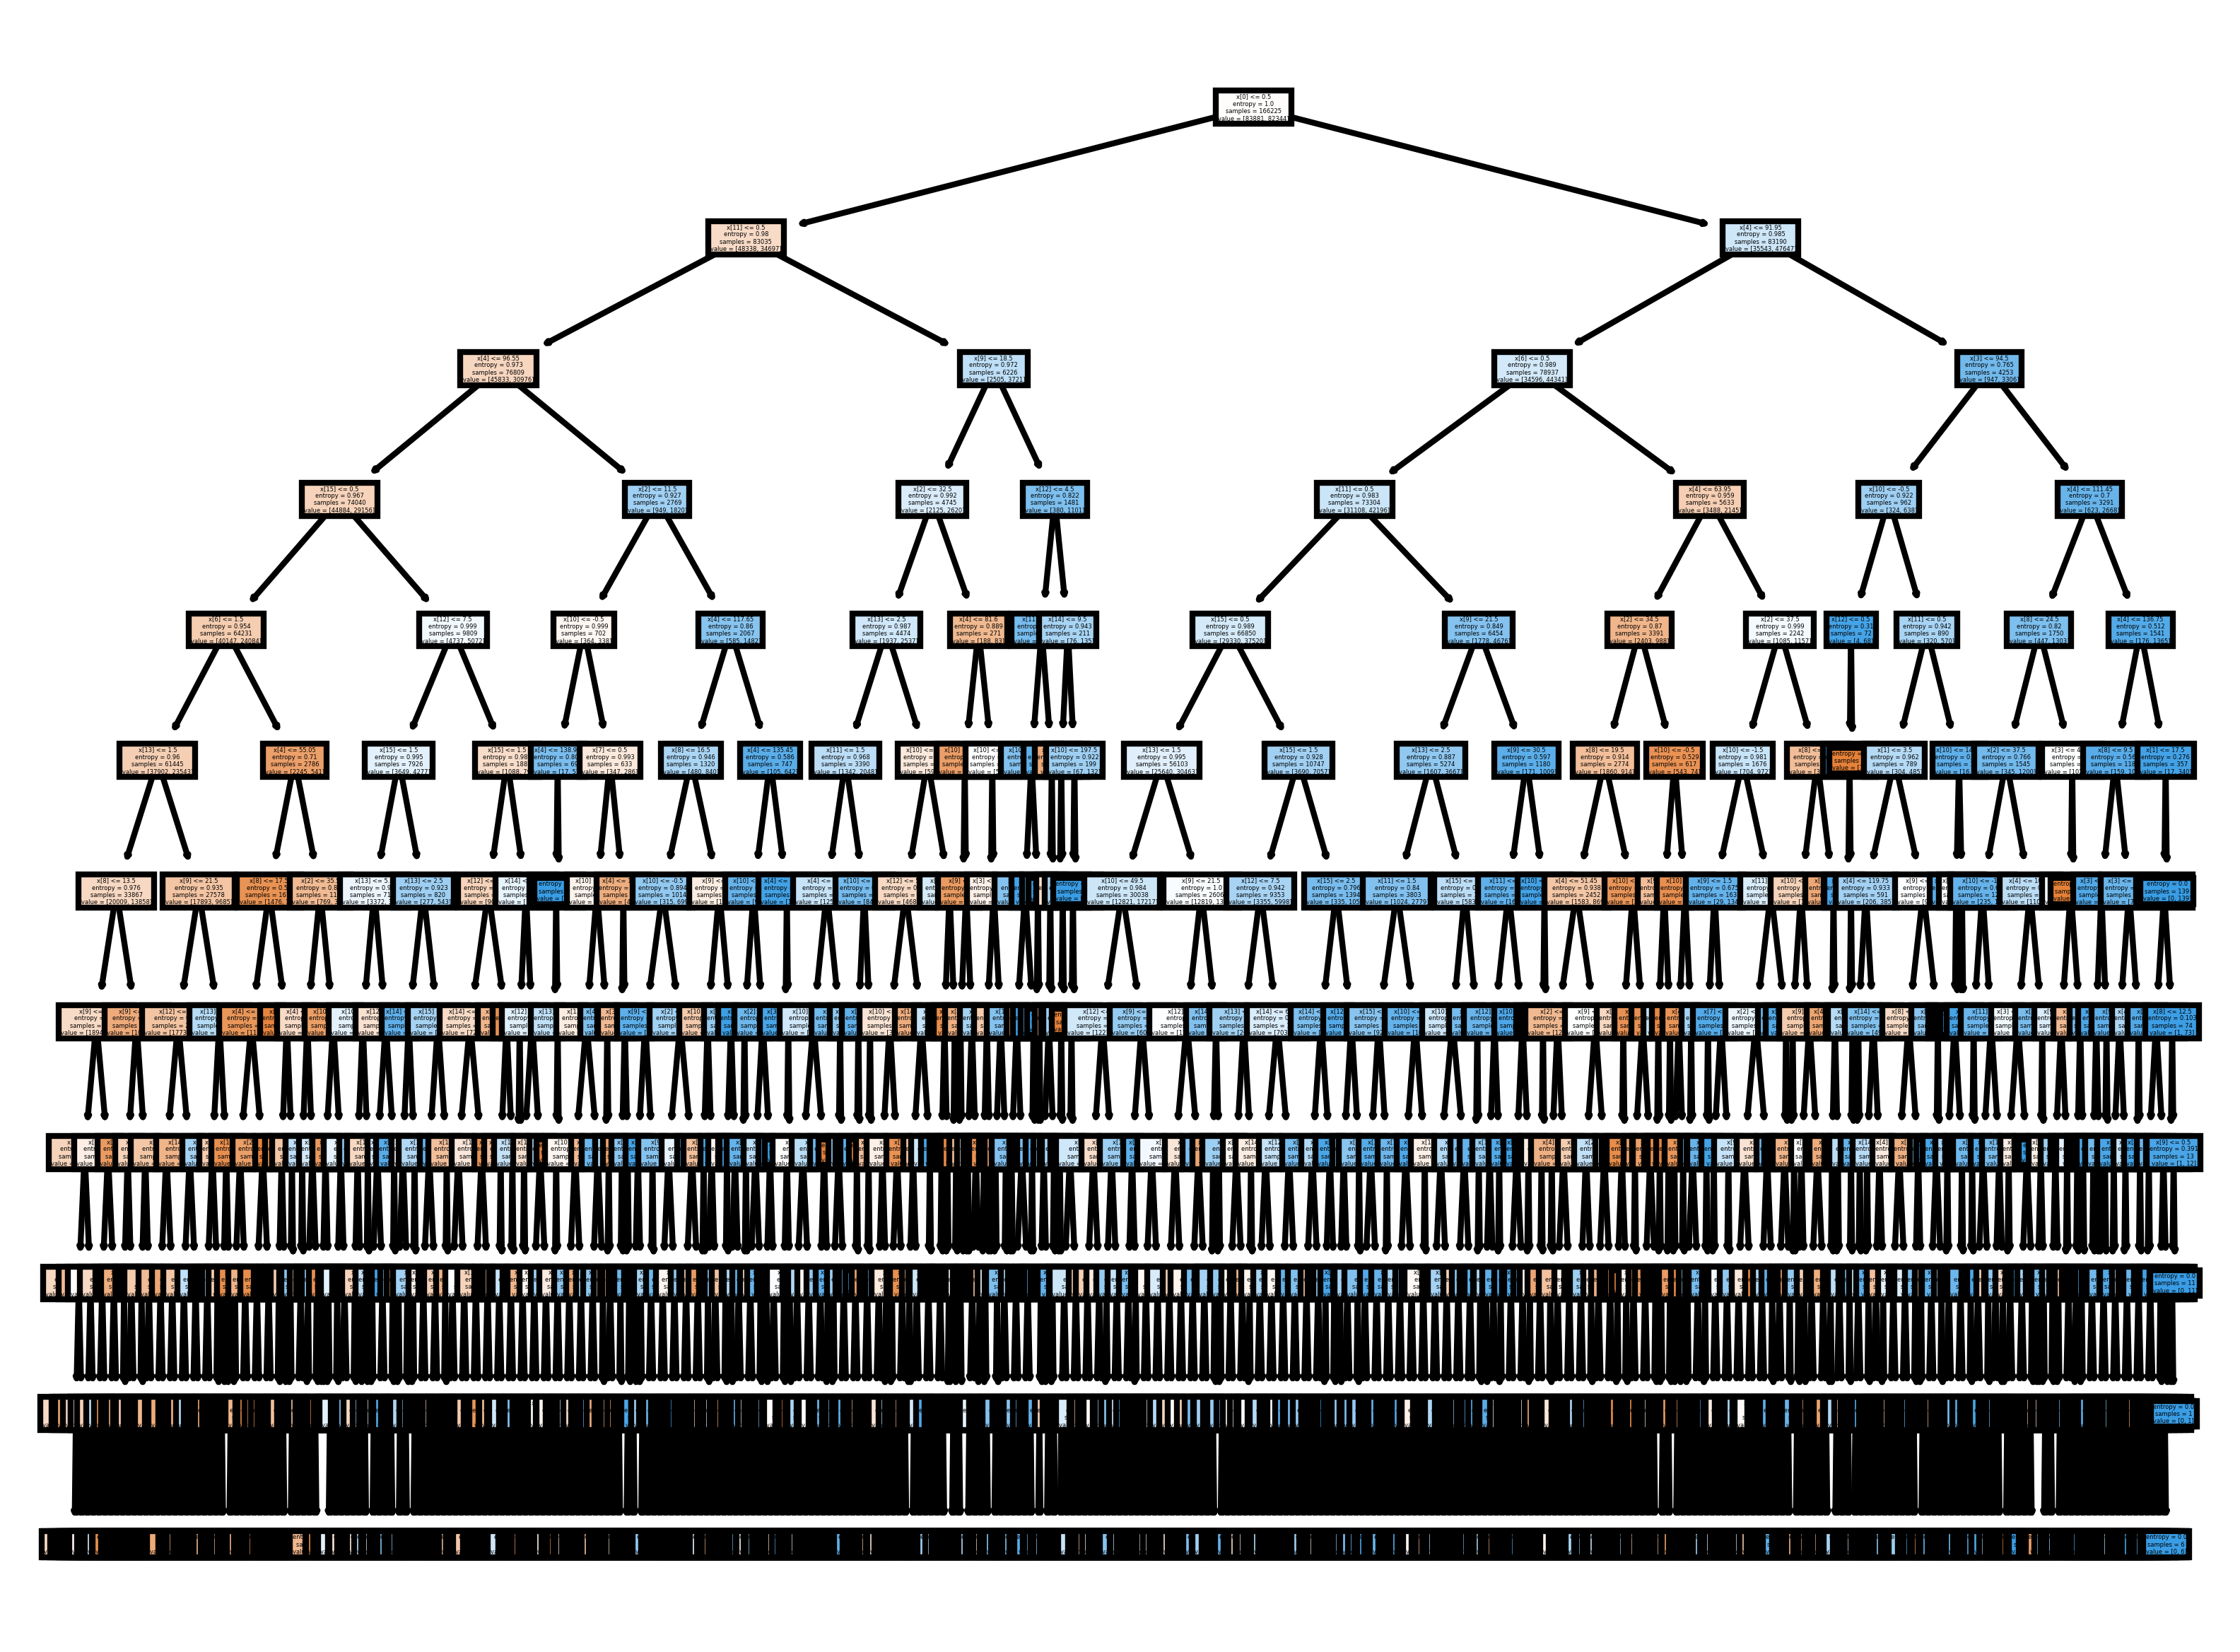

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)
clf.fit(OTrain, OYTrain)

avg_acc = 0
for y in range(100):
    OyPredict = clf.predict(OTrain)
    avg_acc += accuracy_score(OYTrain, OyPredict)
avg_acc /= 100
print("Offense Training accuracy: ", avg_acc)

avg_acc = 0
for y in range(100):
    OyPredict = clf.predict(OTest)
    avg_acc += accuracy_score(OYTest, OyPredict)
avg_acc /= 100
print("Offense Testing accuracy: ", avg_acc)


plt.figure(dpi=600)
tree.plot_tree(clf, filled=True)

Defense Training accuracy:  0.6011912539744769
Defense Testing accuracy:  0.6014281292832834


[Text(0.5310453056768559, 0.95, 'x[0] <= 0.5\nentropy = 0.996\nsamples = 91836\nvalue = [42341, 49495]'),
 Text(0.2896424672489083, 0.85, 'x[4] <= 0.5\nentropy = 0.996\nsamples = 45628\nvalue = [24459, 21169]'),
 Text(0.14171670305676856, 0.75, 'x[1] <= 0.4\nentropy = 0.986\nsamples = 36331\nvalue = [20659, 15672]'),
 Text(0.0670032751091703, 0.65, 'x[3] <= 1.5\nentropy = 0.967\nsamples = 24467\nvalue = [14859, 9608]'),
 Text(0.03302401746724891, 0.55, 'x[3] <= 0.5\nentropy = 0.977\nsamples = 19311\nvalue = [11370, 7941]'),
 Text(0.01910480349344978, 0.45, 'x[5] <= 13.0\nentropy = 0.984\nsamples = 11736\nvalue = [6751, 4985]'),
 Text(0.012008733624454149, 0.35, 'x[2] <= 1.5\nentropy = 0.983\nsamples = 11718\nvalue = [6748, 4970]'),
 Text(0.006550218340611353, 0.25, 'x[7] <= 0.5\nentropy = 0.975\nsamples = 5405\nvalue = [3201, 2204]'),
 Text(0.004366812227074236, 0.15, 'x[1] <= 0.15\nentropy = 0.976\nsamples = 5400\nvalue = [3196, 2204]'),
 Text(0.002183406113537118, 0.05, 'entropy = 0.

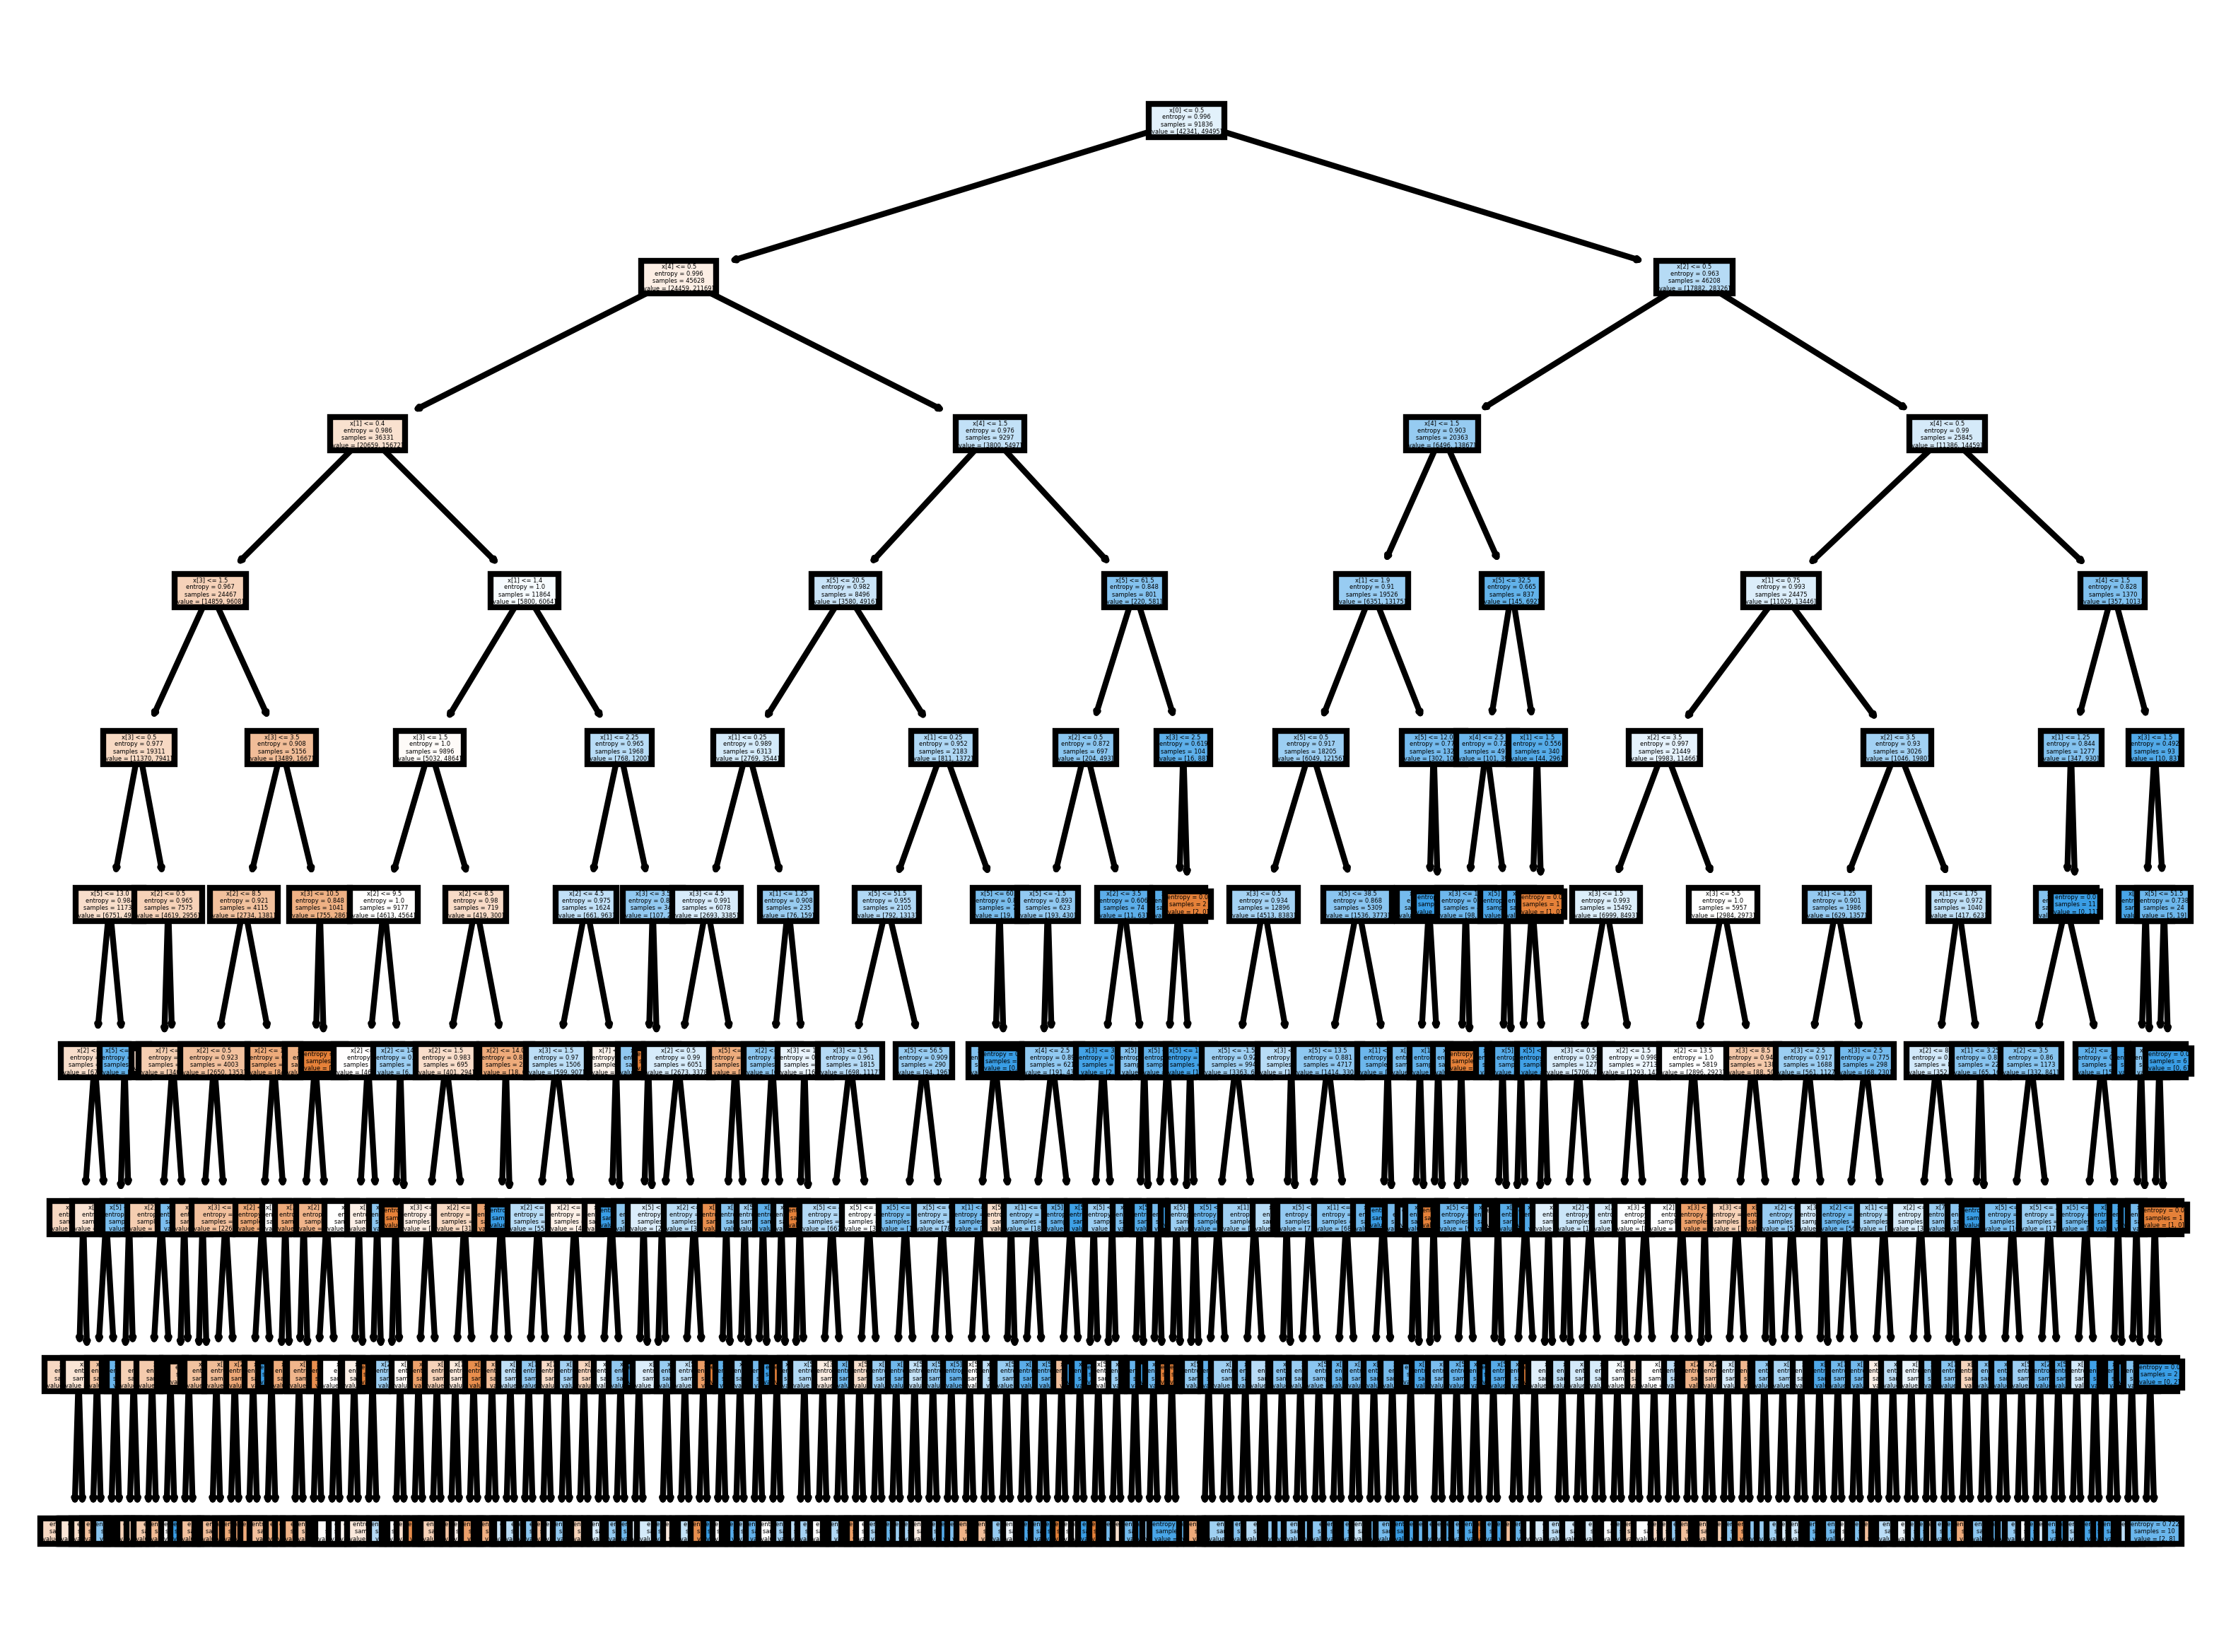

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=9)
clf.fit(DTrain, DYTrain)

avg_acc = 0
for y in range(100):
    DyPredict = clf.predict(DTrain)
    avg_acc += accuracy_score(DYTrain, DyPredict)
avg_acc /= 100
print("Defense Training accuracy: ", avg_acc)

avg_acc = 0
for y in range(100):
    DyPredict = clf.predict(DTest)
    avg_acc += accuracy_score(DYTest, DyPredict)
avg_acc /= 100
print("Defense Testing accuracy: ", avg_acc)


plt.figure(dpi=600)
tree.plot_tree(clf, filled=True)

In [18]:
acc = 0
X = 0
for x in range(2,201):
    clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=x)
    clf2.fit(OTrain, OYTrain)
    yPredict = clf2.predict(OTest)
    if (accuracy_score(OYTest, yPredict) > acc):
        acc = accuracy_score(OYTest, yPredict)
        X = x

print(X, acc)

11 0.615416559793827


In [28]:
acc = 0
X = 0
for x in range(2,201):
    clf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=x)
    clf2.fit(DTrain, DYTrain)
    yPredict = clf2.predict(DTest)
    if (accuracy_score(DYTest, yPredict) > acc):
        acc = accuracy_score(DYTest, yPredict)
        X = x

print(X, acc)

9 0.6014060220188354
